## Decision Tree

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

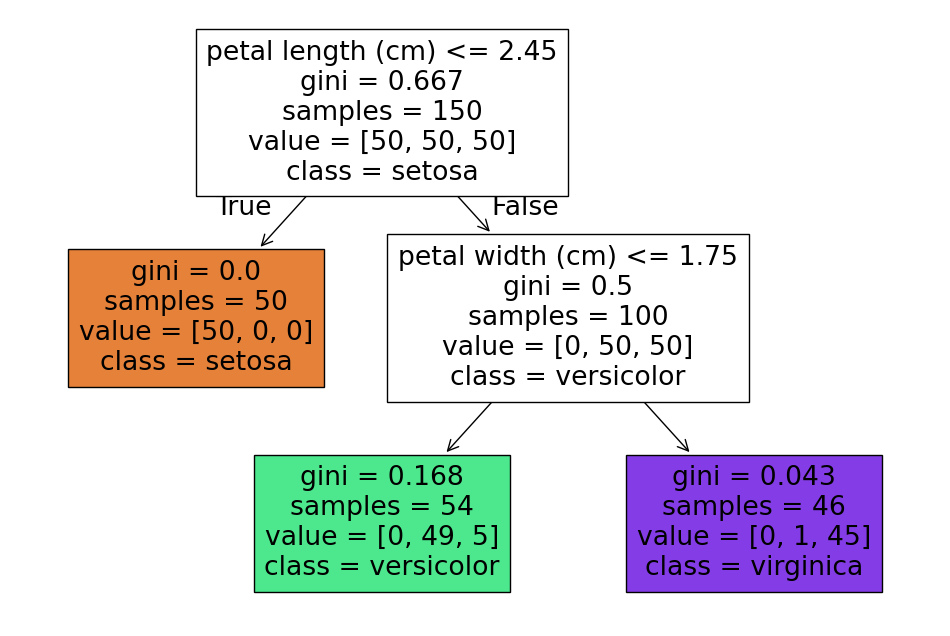

In [ ]:
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

# Fit the model to the data
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


the probability of each class can be predicted, which is the fraction of training samples of the class in a leaf:

In [ ]:
clf.predict_proba(X[:5])


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

## Honest Trees
https://towardsdatascience.com/understanding-causal-trees-920177462149

Another problem with our naive procedure is that we have used the same data to generate the tree and evaluate it. This generates bias because a simple difference in means estimator would not take into account the fact that the partition is endogenous, i.e. generated on the same data. In machine learning terms, we are overfitting. The solution is simple: we can split the sample into two separate subsamples and use different data to generate the tree and compute the predictions. These trees are called honest trees.

In [ ]:
from econml.dml import CausalForestDML
tree_model = CausalForestDML(n_estimators=1, subforest_size=1, inference=False, max_depth=4)
tree_model = tree_model.fit(Y=df[dgp.Y], X=df[X], T=df[dgp.D])

from econml.cate_interpreter import SingleTreeCateInterpreter

intrp = SingleTreeCateInterpreter(max_depth=2).interpret(tree_model, df[X])
intrp.plot(feature_names=X, fontsize=12)


## Random Forest

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%


Note: Accuracy 100% is guaranteed with Iris dataset because it's a very structured dataset with only 4 features and 3 classes and straightforward classification rules.

### Trying other criteria besides gini for evaluating the quality of tree splits in the single decision tree: gini and entropy for **classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Using Gini impurity (default)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

# Using Entropy (Information Gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

### Visualize:

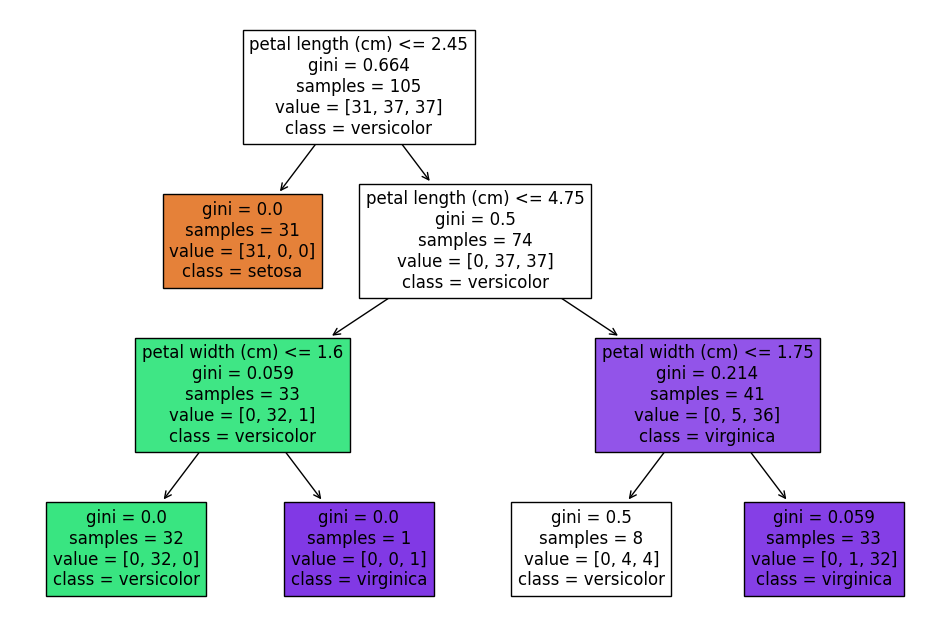

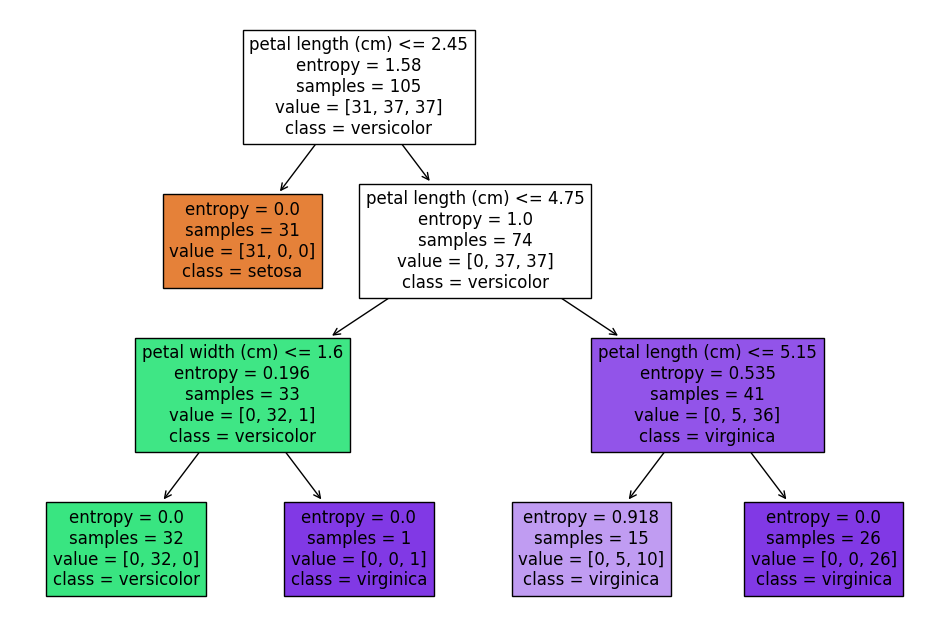

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree with Gini
plt.figure(figsize=(12,8))
plt.title("Decision Tree (Gini Impurity)")
plot_tree(clf_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

# Visualize the decision tree with Entropy
plt.figure(figsize=(12,8))
plt.title("Decision Tree (Entropy)")
plot_tree(clf_entropy, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

### Trying other criteria besides gini for evaluating the quality of tree splits in the single decision tree: MSE and MAE for **regression**

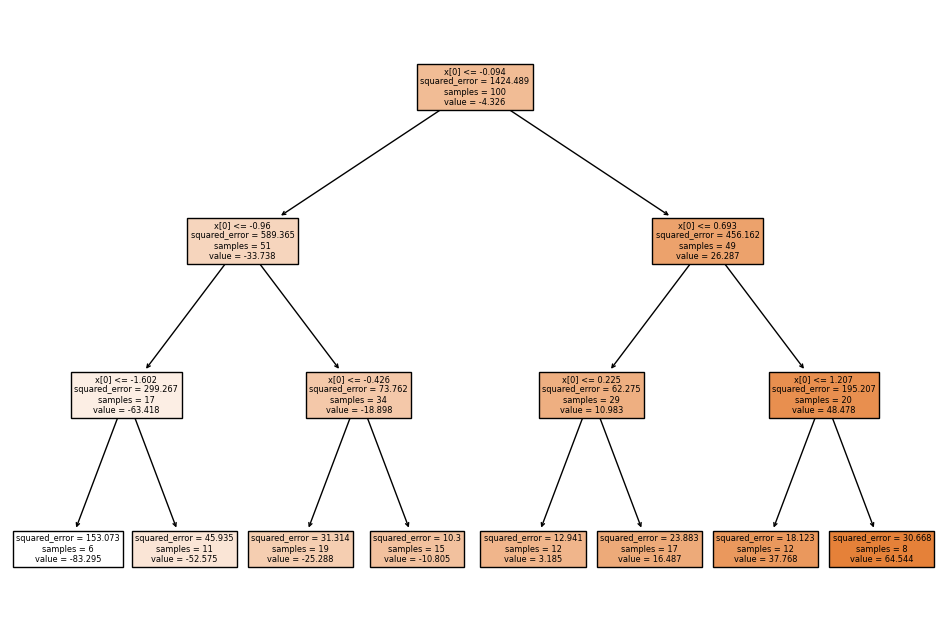

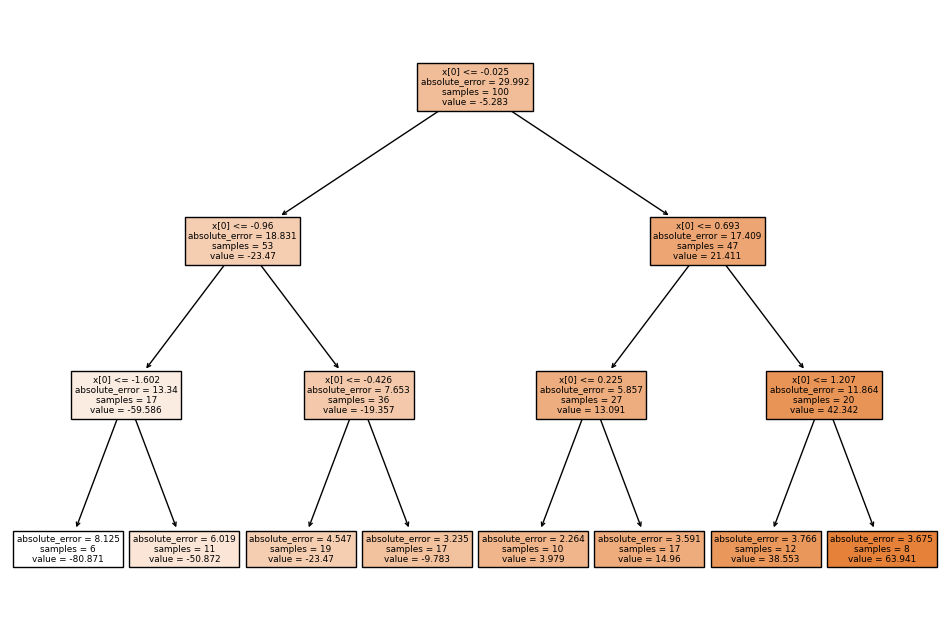

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Create two decision tree regressors (one for MSE, one for MAE)
reg_mse = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=42)
reg_mae = DecisionTreeRegressor(criterion='absolute_error', max_depth=3, random_state=42)

# Fit both regressors to the data
reg_mse.fit(X, y)
reg_mae.fit(X, y)

# Visualize the regression tree with MSE
plt.figure(figsize=(12,8))
plt.title("Regression Tree (MSE - Mean Squared Error)")
plot_tree(reg_mse, filled=True)
plt.show()

# Visualize the regression tree with MAE
plt.figure(figsize=(12,8))
plt.title("Regression Tree (MAE - Mean Absolute Error)")
plot_tree(reg_mae, filled=True)
plt.show()


# Causal Forest:

Causal Forests are the equivalent of random forests, but for the estimation of heterogeneous treatment effects, exactly as for causal trees and regression trees. Exactly as for Causal Trees, we have a fundamental problem: we are interested in predicting an object that we do not observe: the individual treatment effects τᵢ. The solution is to create an auxiliary outcome variable Y* whose expected value for every single observation is exactly the treatment effect.

![image.png](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*DO6eIZVSmwc10I1mZ9KyeQ.png)



In [ ]:
from econml.dml import CausalForestDML

np.random.seed(0)
forest_model = CausalForestDML(max_depth=3)
forest_model = forest_model.fit(Y=df[dgp.Y], X=df[X], T=df[dgp.D])


Differently from Causal Trees, Causal Forests are harder to interpret since we cannot visualize every single tree.

We can use the SingleTreeCateInterpreter function to plot an equivalent representation of the Causal Forest algorithm.

In [ ]:
from econml.cate_interpreter import SingleTreeCateInterpreter

intrp = SingleTreeCateInterpreter(max_depth=2).interpret(forest_model, df[X])
intrp.plot(feature_names=X, fontsize=12)
